In [9]:
import pandas as pd
import seaborn as sns

In [26]:
df1 = pd.read_csv('resulthealth.csv')
df2 = pd.read_csv('agedistribution.csv')
df3 = pd.read_csv('neighborhood-vehicles.csv')

merged_df = pd.merge(df1, df2, on='Name', how='inner')
merged_df = pd.merge(merged_df, df3, on='Name', how='inner')
merged_df.head()

,Name,TotChild,OlderAdult,MedIllnes,POC2,LEP,Low_to_No,TotDis,MBTA_Stops_Count,NO2,...,5 - 17,18 - 24,25 - 34,35 - 64,> 65,Payroll Jobs,Labor Force,Total Population,At least one vehicle (%),Vehicles to Households Ratio
0,Allston,173,144,2831.85,3011,3444,3300,400,4,24.231629,...,3,51,27,14,3,16522,11478,22312,53,0.61
1,Brighton,4244,5847,23936.80,19768,22914,17067,5502,8,23.221051,...,5,29,31,22,10,16860,28825,52685,68,1.02
2,Dorchester,17424,6535,25010.76,50778,29284,22749,9819,3,21.240612,...,17,11,19,38,10,25436,68104,124489,69,0.98
3,Back Bay,1686,3759,11842.96,6923,9075,5316,1892,6,25.369122,...,3,6,44,30,15,52623,11530,17577,53,0.67
4,South End,2552,1421,6516.80,6384,5925,4504,1874,6,23.897494,...,8,8,28,38,12,30387,19900,31601,57,0.72


In [30]:
merged_df.columns

Index(['Name', 'TotChild', 'OlderAdult', 'MedIllnes', 'POC2', 'LEP',
       'Low_to_No', 'TotDis', 'MBTA_Stops_Count', 'NO2', 'O3', 'PM10', 'PM2.5',
       'SO2', 'AQI', 'Category', 'Bus_Stops_Count',
       'Blue_Bikes_Stations_Count', 'Blue_Bikes_Docks_Count', 'ZipCode',
       'Transit_Stops', 'Number of Open Spaces', 'CASTHMA_CrudePrev',
       'COPD_CrudePrev', 'CHD_CrudePrev', 'STROKE_CrudePrev',
       'HIGHCHOL_CrudePrev', 'GHLTH_CrudePrev', 'PHLTH_CrudePrev',
       'MHLTH_CrudePrev', 'CSMOKING_CrudePrev', 'BINGE_CrudePrev',
       'LPA_CrudePrev', 'OBESITY_CrudePrev', 'SLEEP_CrudePrev', '<5', '5 - 17',
       '18 - 24', '25 - 34', '35 - 64', '> 65', 'Payroll Jobs', 'Labor Force',
       'Total Population', 'At least one vehicle (%)',
       'Vehicles to Households Ratio'],
      dtype='object')

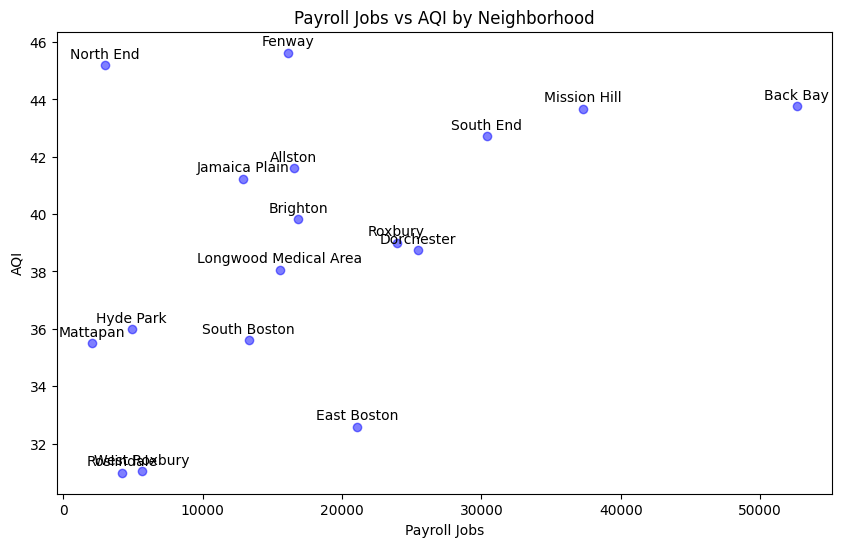

In [27]:
# Payroll Jobs vs Air Quality

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = merged_df.copy()

# Extract columns
neighborhoods = data['Name']
payroll_jobs = data['Payroll Jobs']
pm25 = data['AQI']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(payroll_jobs, pm25, c='blue', alpha=0.5)

# Adding labels and title
plt.title('Payroll Jobs vs AQI by Neighborhood')
plt.xlabel('Payroll Jobs')
plt.ylabel('AQI')

# Adding text labels for each point (neighborhood)
for i, neighborhood in enumerate(neighborhoods):
    plt.annotate(neighborhood, (payroll_jobs[i], pm25[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()


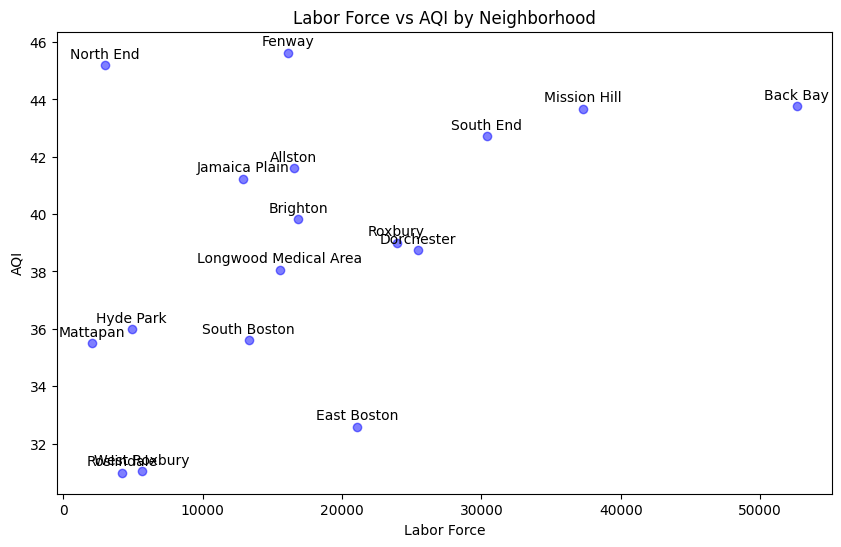

In [20]:
# Payroll Jobs vs Air Quality

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = merged_df.copy()

# Extract columns
neighborhoods = data['Name']
labor_force = data['Labor Force']
pm25 = data['AQI']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(payroll_jobs, pm25, c='blue', alpha=0.5)

# Adding labels and title
plt.title('Labor Force vs AQI by Neighborhood')
plt.xlabel('Labor Force')
plt.ylabel('AQI')

# Adding text labels for each point (neighborhood)
for i, neighborhood in enumerate(neighborhoods):
    plt.annotate(neighborhood, (payroll_jobs[i], pm25[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()


Correlation coefficient: -0.11905423556248147


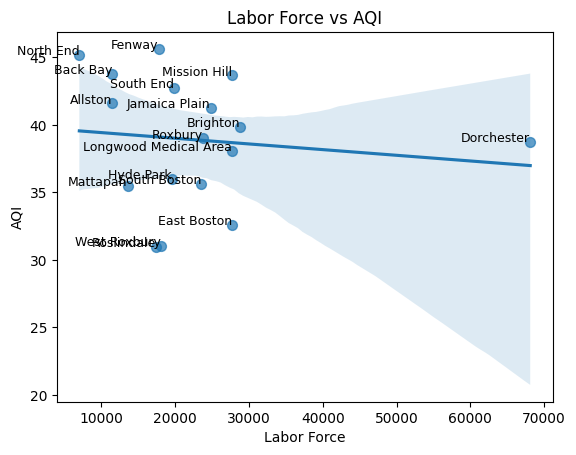

In [37]:
correlation = data['Labor Force'].corr(data['AQI'])
print(f"Correlation coefficient: {correlation}")

sns.regplot(x='Labor Force', y='AQI', data=data, scatter_kws={'s': 50, 'alpha': 0.7})

for i, neighborhood in enumerate(data['Name']):
    plt.text(data['Labor Force'][i], data['AQI'][i], neighborhood, fontsize=9, ha='right')

plt.title('Labor Force vs AQI')

plt.show()

Correlation coefficient: 0.4750788172452632


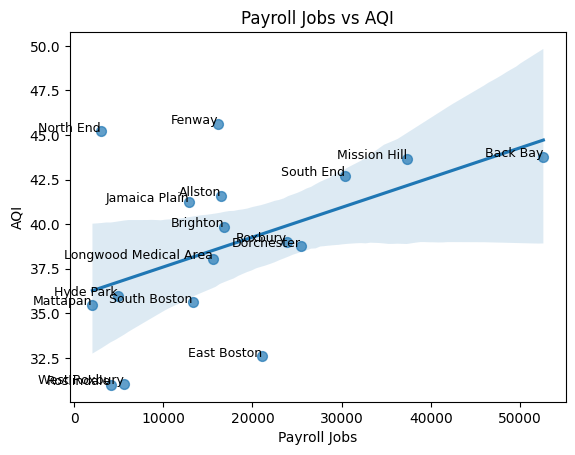

In [22]:
correlation = data['Payroll Jobs'].corr(data['AQI'])
print(f"Correlation coefficient: {correlation}")

sns.regplot(x='Payroll Jobs', y='AQI', data=data, scatter_kws={'s': 50, 'alpha': 0.7})

for i, neighborhood in enumerate(data['Name']):
    plt.text(data['Payroll Jobs'][i], data['AQI'][i], neighborhood, fontsize=9, ha='right')

plt.title('Payroll Jobs vs AQI')

plt.show()

Correlation coefficient: -0.7414447161970923


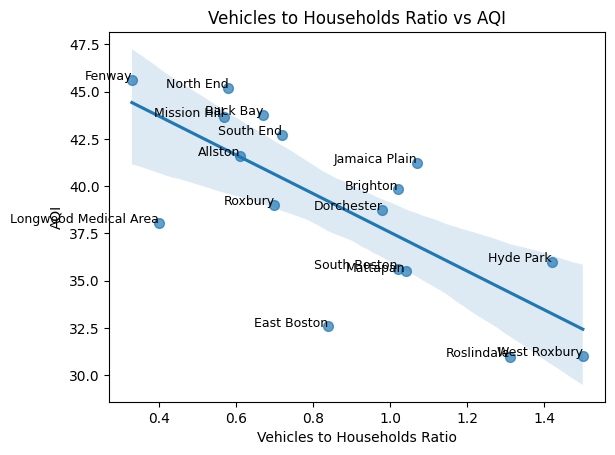

In [23]:
correlation = data['Vehicles to Households Ratio'].corr(data['AQI'])
print(f"Correlation coefficient: {correlation}")

sns.regplot(x='Vehicles to Households Ratio', y='AQI', data=data, scatter_kws={'s': 50, 'alpha': 0.7})

for i, neighborhood in enumerate(data['Name']):
    plt.text(data['Vehicles to Households Ratio'][i], data['AQI'][i], neighborhood, fontsize=9, ha='right')

plt.title('Vehicles to Households Ratio vs AQI')

plt.show()

Correlation coefficient: 0.5310919046666938


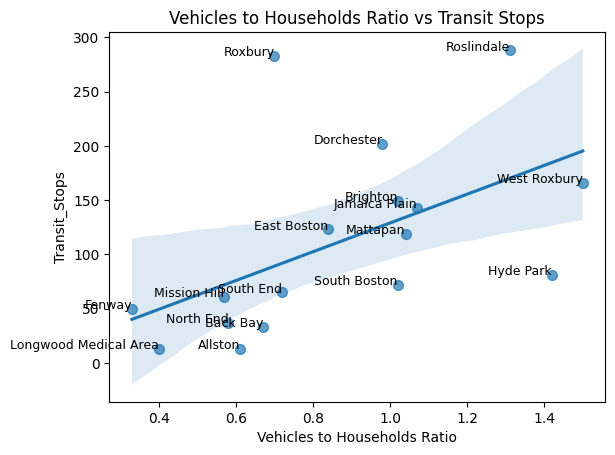

In [36]:
correlation = data['Vehicles to Households Ratio'].corr(data['Transit_Stops'])
print(f"Correlation coefficient: {correlation}")

sns.regplot(x='Vehicles to Households Ratio', y='Transit_Stops', data=data, scatter_kws={'s': 50, 'alpha': 0.7})

for i, neighborhood in enumerate(data['Name']):
    plt.text(data['Vehicles to Households Ratio'][i], data['Transit_Stops'][i], neighborhood, fontsize=9, ha='right')

plt.title('Vehicles to Households Ratio vs Transit Stops')

plt.show()

Correlation coefficient: -0.7329137134637116


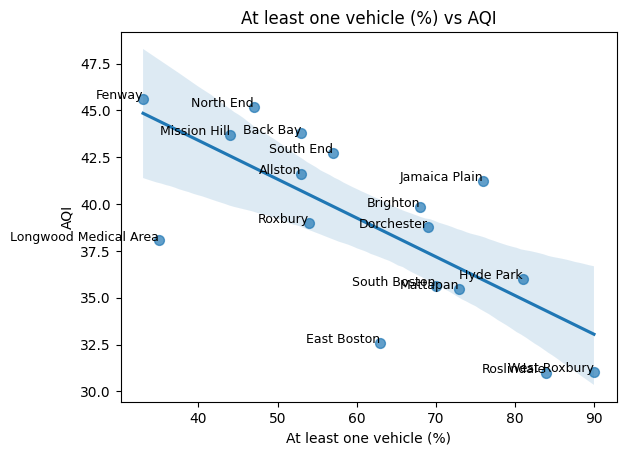

In [28]:
correlation = data['At least one vehicle (%)'].corr(data['AQI'])
print(f"Correlation coefficient: {correlation}")

sns.regplot(x='At least one vehicle (%)', y='AQI', data=data, scatter_kws={'s': 50, 'alpha': 0.7})

for i, neighborhood in enumerate(data['Name']):
    plt.text(data['At least one vehicle (%)'][i], data['AQI'][i], neighborhood, fontsize=9, ha='right')

plt.title('At least one vehicle (%) vs AQI')

plt.show()

Correlation coefficient: -0.5376964457332881


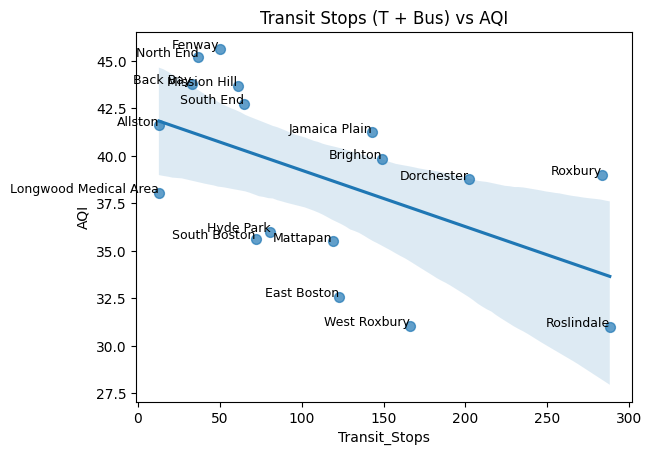

In [38]:
correlation = data['Transit_Stops'].corr(data['AQI'])
print(f"Correlation coefficient: {correlation}")

sns.regplot(x='Transit_Stops', y='AQI', data=data, scatter_kws={'s': 50, 'alpha': 0.7})

for i, neighborhood in enumerate(data['Name']):
    plt.text(data['Transit_Stops'][i], data['AQI'][i], neighborhood, fontsize=9, ha='right')

plt.title('Transit Stops (T + Bus) vs AQI')

plt.show()

Correlation coefficient: 0.1791979754560291


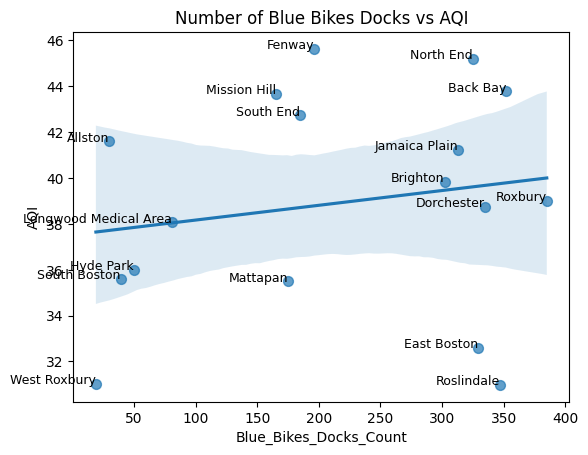

In [39]:
correlation = data['Blue_Bikes_Docks_Count'].corr(data['AQI'])
print(f"Correlation coefficient: {correlation}")

sns.regplot(x='Blue_Bikes_Docks_Count', y='AQI', data=data, scatter_kws={'s': 50, 'alpha': 0.7})

for i, neighborhood in enumerate(data['Name']):
    plt.text(data['Blue_Bikes_Docks_Count'][i], data['AQI'][i], neighborhood, fontsize=9, ha='right')

plt.title('Number of Blue Bikes Docks vs AQI')

plt.show()